# Project Name:SPAM EMAIL DETECTION

# Developed by : Jyoti Shinde

# Submitted to: Cognorise infotech

## Problem Statement: Create a model to classify emails as spam or not spam based on their content.

### Dataset:https://www.kaggle.com/datasets/mfaisalqureshi/spam-email

### Let's begin!

In [1]:
# Import all required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Read dataset

In [2]:
df = pd.read_csv('spam.csv')

### Data Exploration

In [3]:
# Top 5 rows
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# last 5 rows
df.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
# Shape of dataset
df.shape

(5572, 2)

In [7]:
# column name
df.columns

Index(['Category', 'Message'], dtype='object')

In [8]:
#some statistics of data
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
#count of null values in each column
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [10]:
#data type of each column
df.dtypes

Category    object
Message     object
dtype: object

In [11]:
df.duplicated().sum()

415

In [12]:
df.drop_duplicates()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [13]:
df.columns = ['category', 'text']

In [14]:
df.head()

,category,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['category'] = encoder.fit_transform(df['category'])
df['category']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: category, Length: 5572, dtype: int32

In [16]:
df.head()

,category,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
x = df['category']
print(x)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: category, Length: 5572, dtype: int32


In [18]:
y = df['text']
print(y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object


### Data visualization

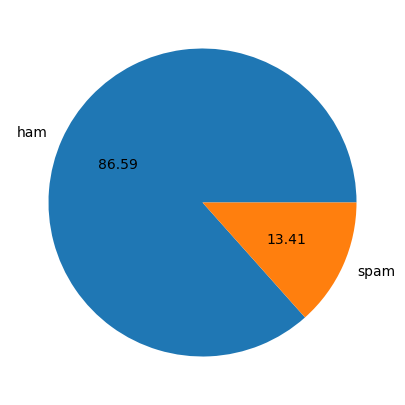

In [19]:
fig = plt.figure(figsize = (10, 5))
plt.pie(df['category'].value_counts(), labels = ['ham','spam'], autopct = '%0.2f')
plt.show()

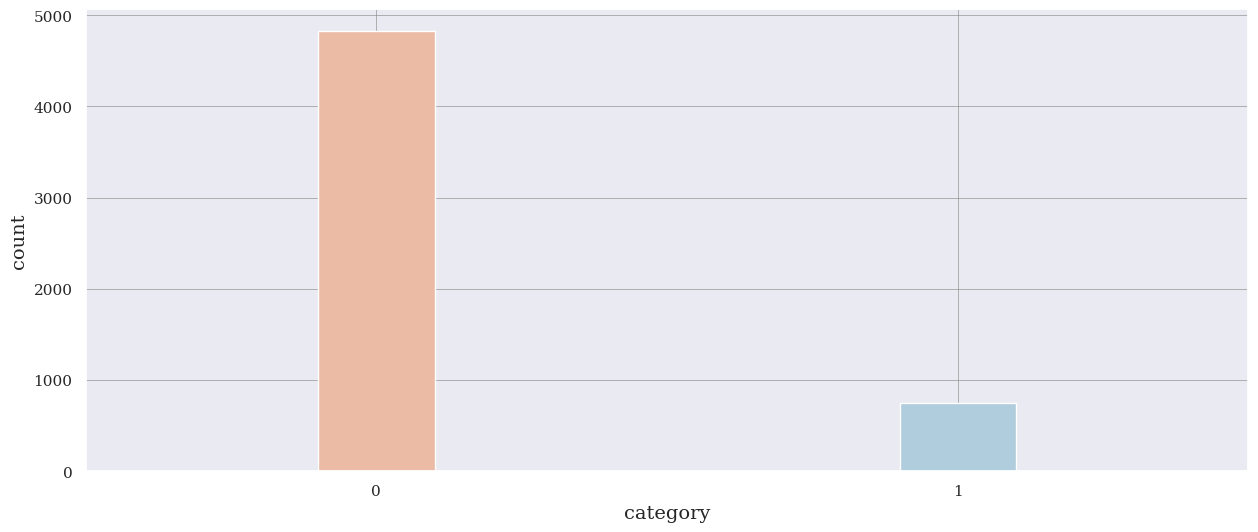

In [20]:
sns.set(rc = {'figure.figsize':(15, 6)})
sns.countplot(x = 'category', data = df, palette = 'RdBu', width = 0.2)
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("category", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel("count", fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.show()

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
label_encoder = LabelEncoder()
df['category'] = label_encoder.fit_transform(df['category'])

## Train Test split

In [23]:
x = df['text']
y = df['category']

In [24]:
print(x)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object


In [25]:
print(y)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: category, Length: 5572, dtype: int64


In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 50, test_size = .2)

In [27]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words = 'english', lowercase = True)
x_train_features = feature_extraction.fit_transform(x_train)
x_test_features = feature_extraction.transform(x_test)
y_train = y_train.astype('int')
y_test = y_test.astype('int')
     

In [28]:
print(x.shape)

(5572,)


In [29]:
print(x_train.shape)

(4457,)


In [30]:
print(x_test.shape)

(1115,)


## Model Building

In [31]:
lo=LogisticRegression()
lo.fit(x_train_features, y_train)

LogisticRegression()

## Model evaluation

In [32]:
prediction = lo.predict(x_train_features)
accuracy = accuracy_score(y_train, prediction)
accuracy

0.9663450751626654

In [33]:
prediction = lo.predict(x_test_features)
accuracy = accuracy_score(y_test, prediction)
accuracy

0.9668161434977578

## Making sample prediction

In [34]:
demo_email = ['buy one get two movie tickets']

features = feature_extraction.transform(demo_email)

prediction = lo.predict(features)
print(prediction)

if (prediction[0] == 1):
    print("This is a ham email")
else:
    print("This is a spam email")

[0]
This is a spam email
